# GRAVITY data reduction process: Generating plots for the $Br\gamma$ line 


**Pablo Marcos-Arenal**

Centro de Astrobiología (INTA-CSIC)


That file intends to cover the full data reduction process and analysis of near-infrared K- band observations with the GRAVITY interferometer at Very Large Telescope Interferometer (VLTI) at the Paranal Observatory. 
It is centered in the $Br\gamma$  and adjacent continuum emmision waverange. 

These observations of Herbig Ae/Be stars provide with spatially and spectrally resolved data of their inner disks.

In [3]:
#Import modules
import numpy as np
import pandas as pd
from gravi_plot_functions import *
import gravity_plots_generator as gpg
import matplotlib.gridspec as gridspec
from scipy.signal import convolve as scipy_convolve


miV590Mon = gpg.InputStar('V590Mon')
miPDS281 = gpg.InputStar('PDS281')
miHD94509 = gpg.InputStar('HD94509')
miDGCir = gpg.InputStar('DGCir')
miHD141926 = gpg.InputStar('HD141926')

all_sources = [miV590Mon,miPDS281,miHD94509,miDGCir,miHD141926]


plot_figure = False
save_figure = False


# Set up
The previously processed observation still need to get a post-processing calibration in order to retrieve some Bad-pixels effect and telluric lines. It will also be continuum-corrected afterwards.

First, the Flux and visibilities for each telescope unit is represented as a function of wavelength.

The calibration images do also need to get Bad-pixels correction.

### Flux
Plot of the flux for each of the units [U1,U2,U3,U4] and its averaged value. 
This plot outlines spurious lines that needs to be removed. 

In [4]:
miV590Mon.figure_flux_preprocessing(plot_figure, save_figure)
miPDS281.figure_flux_preprocessing(plot_figure, save_figure)
miDGCir.figure_flux_preprocessing(plot_figure, save_figure)
miHD94509.figure_flux_preprocessing(plot_figure, save_figure)
miHD141926.figure_flux_preprocessing(plot_figure, save_figure)

## Squared visibility in full range

In [5]:
miV590Mon.figure_full_range_visibility_preprocessing(plot_figure, save_figure)
miPDS281.figure_full_range_visibility_preprocessing(plot_figure, save_figure)
miDGCir.figure_full_range_visibility_preprocessing(plot_figure, save_figure)
miHD94509.figure_full_range_visibility_preprocessing(plot_figure, save_figure)
miHD141926.figure_full_range_visibility_preprocessing(plot_figure, save_figure)

### Bad pixels removal
Using the previous figures as a reference, we will remove these sporeus lines coming from bad pixels adding signal to the spectrum and not coming from the observed source.

It is created a *bad pixel map* where every wavelength channel has a value of 1 if it is correct and 0 if it is associated to a bad pixel. 

It is set the *rejection\_criterium\_flux*  variable with the fraction to establish whether a difference between to datasets can be considered a bad pixel or not. We apply this criterium to fluxes and visibilities to cross-calibrate the rejection criterium.

The *general\_rejection\_criterium* is applied to the final *bad\_pixel\_mask* to take in account both fluxes and visibilities rejection criteria as a whole.

These results are plotted in pixel maps where pixels associated to wavelength channels are distributed left to right and top to bottom to cover a rectangular map. 
        



In [6]:
miV590Mon.figure_badpixel_flux_preprocessing(plot_figure, save_figure)
miPDS281.figure_badpixel_flux_preprocessing(plot_figure, save_figure)
miHD94509.figure_badpixel_flux_preprocessing(plot_figure, save_figure)
miDGCir.figure_badpixel_flux_preprocessing(plot_figure, save_figure)
miHD141926.figure_badpixel_flux_preprocessing(plot_figure, save_figure)

### Bad Pixel removal from calibration spectra
In this case, there is also a replacement of Bad Pixels by NaN data, but those holes are now replaced by an interpolated value through convolution.
This cannot be the case in science image because we will be replacing observational data (which might be incorrect) by interpolated data. 
What we do is using NaN to make sure that we do not compute Bad Data in our wavelengths channels of interest.
For calibration data we do can replace bad data with interpolated data, specially in that wavelengths ranges where we are interested in but the calibrator matches with Bad pixels.

We use the averaged the flux of both observations in all telescope units to get the convolved flux. 
All fluxes (in both observations an all telescope units) are compared to this to remove bad pixels and substitute them by NaN. These are replaced afterwards by a new averaged flux (after bad pixels removal).  

In [7]:
miV590Mon.figure_badpixel_calibration_preprocessing(0.5,plot_figure, save_figure)
miPDS281.figure_badpixel_calibration_preprocessing(0.5,plot_figure, save_figure)
miHD94509.figure_badpixel_calibration_preprocessing(0.5, plot_figure, save_figure)
miDGCir.figure_badpixel_calibration_preprocessing(0.5, plot_figure, save_figure)
miHD141926.figure_badpixel_calibration_preprocessing(0.5, plot_figure, save_figure)


<Figure size 1296x864 with 0 Axes>

### Bad Pixel removal from visibilities 
Outliers in visibilities are not necesarily removed in the previous bad pixel in flux
since outliers in different baselines seem not to be related to a common pixel map. 
Therefore all outliers are rejected based on a different criterium. 
Since there are no shifts in visibilities for any of our sources (see figures generated at figure_full_range_visibility_preprocessing() function), we can simply reject outliers > sigma_coefficient * standard deviation. 

This is similar to use a different bad pixel mask for each baseline.


In [8]:
sigma_coefficient = 4

x_axis_lim = [1.98,2.45]
y_axis_lim = [0,0.5]
y_axis_lim = [-1,2]
miV590Mon.figure_badpixel_V2_preprocessing(x_axis_lim,y_axis_lim, sigma_coefficient, plot_figure, save_figure)

y_axis_lim = [0.9,1.1]
y_axis_lim = [-1,2]
miPDS281.figure_badpixel_V2_preprocessing(x_axis_lim,y_axis_lim, sigma_coefficient, plot_figure, save_figure)

y_axis_lim = [0.0,1.25]
y_axis_lim = [-1,2]
miHD94509.figure_badpixel_V2_preprocessing(x_axis_lim,y_axis_lim, sigma_coefficient, plot_figure, save_figure)

y_axis_lim = [0.0,1]
y_axis_lim = [-1,2]
miDGCir.figure_badpixel_V2_preprocessing(x_axis_lim,y_axis_lim, sigma_coefficient, plot_figure, save_figure)

y_axis_lim = [0.6,1.4]
y_axis_lim = [-2,4]
miHD141926.figure_badpixel_V2_preprocessing(x_axis_lim,y_axis_lim, sigma_coefficient, plot_figure, save_figure)



### Remove HD 94509 outliers manually
Negative values of $V^2$ in every baseline will be replaced by NaNs. This NaNs will be replaced afterwards.

In [9]:
x_axis_lim = [2.167,2.171]


source = miHD94509
HD94509_rejection_limit = 0

#Calculate index of the plot limits         
index_lower_x_axis_lim = min(range(len(source.wl_A)), key=lambda i: abs(source.wl_A[i]-x_axis_lim[0]))
index_higher_x_axis_lim  = min(range(len(source.wl_A)), key=lambda i: abs(source.wl_A[i]-x_axis_lim[1]))

   
for  key, value in source.visibility2.items():
    #print(key,source.visibility2[key][index_lower_x_axis_lim:index_higher_x_axis_lim])
    for index in range(index_lower_x_axis_lim,index_higher_x_axis_lim):
        if source.visibility2[key][index]<HD94509_rejection_limit:
            source.visibility2[key][index] = np.NaN

              
fig, ax = plt.subplots()

# Plot subplots
ax.plot(source.wl_A, source.visibility2['U4U2'], "*-b",label='Mean (A,B)')
ax.set_title(source.source + ' V2')
ax.set_ylabel('$V^2$')
ax.set_xlim(x_axis_lim)


#Save figure
if save_figure:
    #Save figure to disk
    fig.savefig('./figures/'+str(source.source) + "_outliers_removal" + ".eps", dpi=300)


#Close figure if plot_figure=False
if plot_figure==False:
    plt.close(fig)    # close the figure window
 

### Remove DGCir outlers manually
Negative values of $V^2$ will be replaced by NaNs. This NaNs will be replaced afterwards.

In [10]:
x_axis_lim = [2.167,2.171]


source = miHD94509
HD94509_rejection_limit = 0

#Calculate index of the plot limits         
index_lower_x_axis_lim = min(range(len(source.wl_A)), key=lambda i: abs(source.wl_A[i]-x_axis_lim[0]))
index_higher_x_axis_lim  = min(range(len(source.wl_A)), key=lambda i: abs(source.wl_A[i]-x_axis_lim[1]))

   
for  key, value in source.visibility2.items():
    #print(key,source.visibility2[key][index_lower_x_axis_lim:index_higher_x_axis_lim])
    for index in range(index_lower_x_axis_lim,index_higher_x_axis_lim):
        if source.visibility2[key][index]<HD94509_rejection_limit:
            source.visibility2[key][index] = np.NaN

              
fig, ax = plt.subplots()

# Plot subplots
ax.plot(source.wl_A, source.visibility2['U4U2'], "*-b",label='Mean (A,B)')
ax.set_title(source.source + ' V2')
ax.set_ylabel('$V^2$')
ax.set_xlim(x_axis_lim)


#Save figure
if save_figure:
    #Save figure to disk
    fig.savefig('./figures/'+str(source.source) + "_outliers_removal" + ".eps", dpi=300)


#Close figure if plot_figure=False
if plot_figure==False:
    plt.close(fig)    # close the figure window
 

### Replace NaN values in flux, visibilities and phases
Once the Bad Pixel removal is applied, NaN values sustitute these Bad Pixels positions. We verify that these NaN values doesn't correspond to spectral lines were science data is retrieved before replacing these NaN values by a convolved value around that position with the *replace_nans_by_interpolated_gaussian()* function in module *gravi_plot_functions*.

In [11]:

#Replace NaN in BPcorrected_flux 
miV590Mon.BPcorrected_flux=replace_nans_by_interpolated_gaussian(miV590Mon.BPcorrected_flux,10)
miPDS281.BPcorrected_flux=replace_nans_by_interpolated_gaussian(miPDS281.BPcorrected_flux,10)
miHD94509.BPcorrected_flux=replace_nans_by_interpolated_gaussian(miHD94509.BPcorrected_flux,10)
miDGCir.BPcorrected_flux=replace_nans_by_interpolated_gaussian(miDGCir.BPcorrected_flux,10)
miHD141926.BPcorrected_flux=replace_nans_by_interpolated_gaussian(miHD141926.BPcorrected_flux,10)

#Replace NaN in visibility2 
for key,value in miV590Mon.visibility2.items():
    miV590Mon.visibility2[key]=replace_nans_by_interpolated_gaussian(miV590Mon.visibility2[key],5)
for key,value in miPDS281.visibility2.items():
    miPDS281.visibility2[key]=replace_nans_by_interpolated_gaussian(miPDS281.visibility2[key],5)
for key,value in miHD94509.visibility2.items():
    miHD94509.visibility2[key]=replace_nans_by_interpolated_gaussian(miHD94509.visibility2[key],5)
for key,value in miDGCir.visibility2.items():
    miDGCir.visibility2[key]=replace_nans_by_interpolated_gaussian(miDGCir.visibility2[key],5)
for key,value in miDGCir.visibility2.items():
    miHD141926.visibility2[key]=replace_nans_by_interpolated_gaussian(miHD141926.visibility2[key],5)

    
#Replace NaN in diff_phase 
for key,value in miV590Mon.diff_phase.items():
    miV590Mon.diff_phase[key]=replace_nans_by_interpolated_gaussian(miV590Mon.diff_phase[key],5)
for key,value in miPDS281.diff_phase.items():
    miPDS281.diff_phase[key]=replace_nans_by_interpolated_gaussian(miPDS281.diff_phase[key],5)
for key,value in miHD94509.diff_phase.items():
    miHD94509.diff_phase[key]=replace_nans_by_interpolated_gaussian(miHD94509.diff_phase[key],5)
for key,value in miDGCir.diff_phase.items():
    miDGCir.diff_phase[key]=replace_nans_by_interpolated_gaussian(miDGCir.diff_phase[key],5)
for key,value in miDGCir.diff_phase.items():
    miHD141926.diff_phase[key]=replace_nans_by_interpolated_gaussian(miHD141926.diff_phase[key],5)
    
    
#Replace NaN in phase_closure 
for key,value in miV590Mon.phase_closure.items():
    miV590Mon.phase_closure[key]=replace_nans_by_interpolated_gaussian(miV590Mon.phase_closure[key],5)
for key,value in miPDS281.phase_closure.items():
    miPDS281.phase_closure[key]=replace_nans_by_interpolated_gaussian(miPDS281.phase_closure[key],5)
for key,value in miHD94509.phase_closure.items():
    miHD94509.phase_closure[key]=replace_nans_by_interpolated_gaussian(miHD94509.phase_closure[key],5)
for key,value in miDGCir.phase_closure.items():
    miDGCir.phase_closure[key]=replace_nans_by_interpolated_gaussian(miDGCir.phase_closure[key],5)
for key,value in miDGCir.phase_closure.items():
    miHD141926.phase_closure[key]=replace_nans_by_interpolated_gaussian(miHD141926.phase_closure[key],5)


### Telluric lines
The calibration flux is normalized to be used in telluric lines removal. 
The Flux is divided by this normalized calibration flux in order to retrieve continuum flux values around our spectral line of interest. 
The values of the spectral lines ($Br\gamma$ in our case) are not taken from the divided by normalized calibration flux since the calibration source also has its own emission line ($Br\gamma$) that shouldn't affect our spectral line of interest.

The corresponding plot is shown in the following section, together with the continuum measurement.


### Continuum Flux measurement
The continuum around our line of interest ($Br\gamma$) is measured in the flux data (after Bad-pixel removal) divided by the normalized calibration flux (Bad-pixel removed).
The following figure shows the wavelength range where the continuum is measured.

For the function *figure_flux_continuum_measurement()* is required to provide x_axis_lim, y_axis_lim.

It is required to provide the array *continuum_range*, where the first two elements are initial and final wavelengths of the left continuum range, while the last two elements are the initial and final wavelengths of the rigth continuum range.

It is also required to provide the *line_range* array with the initial and final wavelengths of the line to be writen to the final spectra.

> 📘
**NOTE:** Line is not divided by calibrator.

In [12]:

x_axis_lim = [2.135,2.195]
line_range=[2.16,2.17]

y_axis_lim =[0.75,1.75] 
continuum_range=[2.15,2.16,2.17,2.18]
line_range=[2.1636,2.17]
miV590Mon.figure_flux_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,line_range, plot_figure, save_figure)

y_axis_lim = [0.75,1.75]
continuum_range=[2.14,2.16,2.17,2.19]
line_range=[2.1615,2.17]
miPDS281.figure_flux_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,line_range, plot_figure, save_figure)

y_axis_lim = [0.75,1.75]
continuum_range=[2.15,2.163,2.17,2.183]
line_range=[2.1647,2.1684]
miHD94509.figure_flux_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,line_range, plot_figure, save_figure)

y_axis_lim = [0.75,1.75]
continuum_range=[2.153,2.163,2.17,2.18]
line_range=[2.1644,2.1684]
miDGCir.figure_flux_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,line_range, plot_figure, save_figure)

y_axis_lim = [0.75,2.1]
continuum_range=[2.14,2.16,2.17,2.19]
line_range=[2.1638,2.168]
miHD141926.figure_flux_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,line_range, plot_figure, save_figure)



### Continuum Visibility measurement


In [13]:
x_axis_lim = [2.14,2.17]

#x_axis_lim = Brg
y_axis_lim = [0,0.5]
continuum_range=[2.141,2.1604]
miV590Mon.figure_visibility_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,plot_figure, save_figure)

y_axis_lim = [0.9,1.1]
continuum_range=[2.1552,2.1615]
miPDS281.figure_visibility_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,plot_figure, save_figure)

y_axis_lim = [0.75,1.25]
continuum_range=[2.1546,2.1635]
miHD94509.figure_visibility_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,plot_figure, save_figure)

y_axis_lim = [0.4,1]
continuum_range=[2.153,2.163]
miDGCir.figure_visibility_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,plot_figure, save_figure)

y_axis_lim = [0.0,1.5]
continuum_range=[2.153,2.163]
miHD141926.figure_visibility_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,plot_figure, save_figure)



Estimation of continuum_visibility2: {'U4U3': 0.0734236275519012, 'U4U2': 0.052115271335270275, 'U4U1': 0.0620657145548404, 'U3U2': 0.2256363600725809, 'U3U1': 0.0910407599426889, 'U2U1': 0.15610686261080978}
Estimation of continuum_visibility2: {'U4U3': 0.9869426136013626, 'U4U2': 0.9979294357296853, 'U4U1': 0.9901091457661076, 'U3U2': 0.9913975584302737, 'U3U1': 0.9639725119852142, 'U2U1': 0.9870973698814869}
Estimation of continuum_visibility2: {'U4U3': 0.9670845185076212, 'U4U2': 0.9637276617310271, 'U4U1': 0.986061317618359, 'U3U2': 0.942031030034755, 'U3U1': 0.9552546181998847, 'U2U1': 0.9452608307220081}
Estimation of continuum_visibility2: {'U4U3': 0.7624048261725016, 'U4U2': 0.7080106011598197, 'U4U1': 0.6190412673931875, 'U3U2': 0.7764260111537833, 'U3U1': 0.6781236116937153, 'U2U1': 0.7890817709633369}
Estimation of continuum_visibility2: {'U4U3': 1.0669620264671607, 'U4U2': 0.9318745052442629, 'U4U1': 1.0382247202975368, 'U3U2': 0.9524466592647193, 'U3U1': 1.011490856209966

### Continuum Differential Phase measurement


In [14]:

#x_axis_lim = Brg
y_axis_lim = [-90,90.5]
continuum_range=[2.141,2.1604]
miV590Mon.figure_diff_phase_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,plot_figure, save_figure)

y_axis_lim = [-7,7.5]
continuum_range=[2.131,2.161]
miPDS281.figure_diff_phase_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,plot_figure, save_figure)

y_axis_lim = [-15,15]
continuum_range=[2.1485,2.1644]
miHD94509.figure_diff_phase_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,plot_figure, save_figure)

y_axis_lim = [-10,10.5]
continuum_range=[2.153,2.163]
miDGCir.figure_diff_phase_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,plot_figure, save_figure)

y_axis_lim = [-10,10.5]
continuum_range=[2.153,2.163]
miHD141926.figure_diff_phase_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,plot_figure, save_figure)



V590Mon Estimation of continuum_diff_phase: {'U4U3': -1.7671471562134968, 'U4U2': -4.868164038596291, 'U4U1': -0.5093354274715693, 'U3U2': -0.7788783303411719, 'U3U1': 0.5522183380264636, 'U2U1': -1.82159089459212} +- {'U4U3': 7.077906336336186, 'U4U2': 8.312830948368923, 'U4U1': 8.678334479626763, 'U3U2': 8.112695054939868, 'U3U1': 6.143790593569994, 'U2U1': 5.5153137841318545}

PDS281 Estimation of continuum_diff_phase: {'U4U3': -0.23913422072580204, 'U4U2': -0.2666691280973197, 'U4U1': -0.4569667833564637, 'U3U2': 0.40020396230266897, 'U3U1': 0.13687027956922293, 'U2U1': -0.019851983401508733} +- {'U4U3': 0.4063070319059079, 'U4U2': 0.29689638968210263, 'U4U1': 0.3930571621302571, 'U3U2': 0.5698052070285285, 'U3U1': 0.41663344062915675, 'U2U1': 0.5039107673050446}

HD94509 Estimation of continuum_diff_phase: {'U4U3': -0.4039584757186603, 'U4U2': 0.1360908710199027, 'U4U1': -1.1724383255243254, 'U3U2': 1.0574286620629287, 'U3U1': 0.006174659947319583, 'U2U1': -0.12047089678110012} +-

In [15]:
miV590Mon.figure_diff_phase_vs_spatial_frecuency(plot_figure, save_figure)
miPDS281.figure_diff_phase_vs_spatial_frecuency(plot_figure, save_figure)
miDGCir.figure_diff_phase_vs_spatial_frecuency(plot_figure, save_figure)
miHD94509.figure_diff_phase_vs_spatial_frecuency(plot_figure, save_figure)
miHD141926.figure_diff_phase_vs_spatial_frecuency(plot_figure, save_figure)


### Continuum Closure Phase measurement


In [16]:

#x_axis_lim = Brg
y_axis_lim = [-90,90.5]
continuum_range=[2.141,2.1604]
miV590Mon.figure_closure_phase_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,plot_figure, save_figure)
plot_figure=False

y_axis_lim = [-7,7.5]
continuum_range=[2.131,2.161]
miPDS281.figure_closure_phase_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,plot_figure, save_figure)

y_axis_lim = [-15,15]
continuum_range=[2.1485,2.1644]
miHD94509.figure_closure_phase_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,plot_figure, save_figure)

y_axis_lim = [-10,10.5]
continuum_range=[2.153,2.163]
miDGCir.figure_closure_phase_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,plot_figure, save_figure)

y_axis_lim = [-10,10.5]
continuum_range=[2.153,2.163]
miHD141926.figure_closure_phase_continuum_measurement(x_axis_lim,y_axis_lim,continuum_range,plot_figure, save_figure)



V590Mon Estimation of continuum_closure_phase: {'U4U3U2': 19.98810911527112, 'U4U3U1': 8.468087493955252, 'U4U2U1': 20.689298504789818, 'U3U2U1': 25.178925784184635} +- {'U4U3U2': 17.692657712111846, 'U4U3U1': 14.845599665018582, 'U4U2U1': 19.561898296083804, 'U3U2U1': 12.22254942157266}

PDS281 Estimation of continuum_closure_phase: {'U4U3U2': -0.2949135986205391, 'U4U3U1': 0.1732379469600005, 'U4U2U1': -0.17608279206916677, 'U3U2U1': -0.8185756232155654} +- {'U4U3U2': 0.6676453260057973, 'U4U3U1': 0.6355817887922017, 'U4U2U1': 0.6344809933556063, 'U3U2U1': 0.7609017210768158}

HD94509 Estimation of continuum_closure_phase: {'U4U3U2': -0.4056009763360038, 'U4U3U1': -0.1574062753122618, 'U4U2U1': 0.23624427004524762, 'U3U2U1': 0.1781751824532165} +- {'U4U3U2': 1.5494039938151154, 'U4U3U1': 1.3038305067241827, 'U4U2U1': 1.700849374905938, 'U3U2U1': 1.7790030499842568}

DGCir Estimation of continuum_closure_phase: {'U4U3U2': -0.80145687461345, 'U4U3U1': -0.49192374243926906, 'U4U2U1': 0.

### $Br\gamma$ visibility measurement
For each source is required to select the range correspondign to the $Br\gamma$ line. This selected range is the same applied to generate OIFITS files to be set as input to the LITpro model.
The maximum value for the squared visibility is measured for each source in that range and named *line_visibility2*.


> ⚠️ Warning: If Continuum Removal is applied afterwards, *line_visibility2* will be overwriten.
> 



In [17]:

plot_range = [2.16,2.17]

line_range = [2.1652,2.168]
miV590Mon.figure_line_visibility2_calculation(line_range, plot_range, plot_figure, save_figure)

line_range = [2.1645,2.169]
miPDS281.figure_line_visibility2_calculation(line_range, plot_range, plot_figure, save_figure)

line_range = [2.1652,2.168]
miHD94509.figure_line_visibility2_calculation(line_range, plot_range, plot_figure, save_figure)

line_range = [2.1652,2.1677]
miDGCir.figure_line_visibility2_calculation(line_range, plot_range, plot_figure, save_figure)

line_range = [2.1640,2.1677]
miHD141926.figure_line_visibility2_calculation(line_range, plot_range, plot_figure, save_figure)

Star: V590Mon
 Key:U4U3 | mean line visibility = 0.09531123270946677 +-0.023108609190190976 
 Key:U4U2 | mean line visibility = 0.06346766014003988 +-0.01561113478235315 
 Key:U4U1 | mean line visibility = 0.07470911087572141 +-0.018596593678472804 
 Key:U3U2 | mean line visibility = 0.23412001297282584 +-0.04683786888791682 
 Key:U3U1 | mean line visibility = 0.09317348287533136 +-0.01891196831946941 
 Key:U2U1 | mean line visibility = 0.17461218013580979 +-0.03794745555599438 

Star: PDS281
 Key:U4U3 | mean line visibility = 0.9900111344114066  +-0.017195069467488486 
 Key:U4U2 | mean line visibility = 0.98896210508361    +-0.01317129959947465 
 Key:U4U1 | mean line visibility = 0.9976176196716665  +-0.014233123725503703 
 Key:U3U2 | mean line visibility = 0.9826530882090135  +-0.018624834207854348 
 Key:U3U1 | mean line visibility = 0.9586295668132119  +-0.013450457540366584 
 Key:U2U1 | mean line visibility = 0.9804839792420866  +-0.016940460058858214 

Star: HD94509
 Key:U4U3 | me

### Safe data to FITS file
Before appliying the continuum removal, the previous results are saved to FITS file to check applicability of  continuum removal process (see below).

In [18]:
output_filename = "before_cont_removal"

miV590Mon.write_to_files(output_filename)
miPDS281.write_to_files(output_filename)
miHD94509.write_to_files(output_filename)
miDGCir.write_to_files(output_filename)
miHD141926.write_to_files(output_filename)


### Continuum removal
Once the continuum around $Br\gamma$ is measured, we applied the continuum_corrector function to retrieve the flux and visibility of the line ($F_l$ and $V_l^2$, respectively).

This function provides the continuum corrected differential phase and visibility of a spectral line, and their errors.
See Eqs. (2) and (3) in Kraus et al. 2012, ApJ, 744, 19.

$$F_l^2 V_l^2 = F^2 V^2 + F_c^2 V_c^2 - 2 · FV · F_c V_c ·\cos\phi$$
$$\sin\phi_l = \sin\phi\frac{\mid FV\mid}{\mid F_l V_l \mid}$$
$$F_l = F - F_c$$

The function is call into the *figure_continuum_corrector()* function as:

*continuum_corrector(wavelength, F, error_F, V2, V2_error, phase, phase_error, cont_F, cont_V2, result_Vl2, result_phasel)*

while *figure_continuum_corrector()* requires x_axis_lim, y_axis_lim and line_range (array with the wavelengths of the line range borders). In order to set these values, check *figure_flux_continuum_measurement()* to evaluate the line range to select.

> ⚠️ Warning: Continuum Removal is not applied!
>
> The outcome is not increasing accuracy and it does increase error bars.

In [19]:
##Check figure_flux_continuum_measurement to evaluate the line range to select
#line_range=[2.16,2.17]
#
#
#line_range=[2.1636,2.17]
#x_axis_lim = [2.16,2.172]
#y_axis_lim = [0,1.2]
#miV590Mon.figure_continuum_corrector(x_axis_lim,y_axis_lim,plot_figure,save_figure)
#
#line_range=[2.1615,2.17]
#y_axis_lim = [0,3]
#miPDS281.figure_continuum_corrector(x_axis_lim,y_axis_lim,plot_figure, save_figure)
#
#line_range=[2.1647,2.1684]
#y_axis_lim = [0,5]
#miHD94509.figure_continuum_corrector(x_axis_lim,y_axis_lim,plot_figure, save_figure)
#
#line_range=[2.1644,2.1684]
#y_axis_lim = [0.4,1.2]
#y_axis_lim = [0,3]
#miDGCir.figure_continuum_corrector(x_axis_lim,y_axis_lim,plot_figure, save_figure)
#
#line_range=[2.1638,2.168]
#y_axis_lim = [0.6,1.4]
#y_axis_lim = [0,3]
#miHD141926.figure_continuum_corrector(x_axis_lim,y_axis_lim,plot_figure, save_figure)
#
#

In [20]:
#output_filename = "continuum_removed"
#
#miV590Mon.write_to_files(output_filename)
#miPDS281.write_to_files(output_filename)
#miHD94509.write_to_files(output_filename)
#miDGCir.write_to_files(output_filename)
#miHD141926.write_to_files(output_filename)

# Results 
### 3 plots: Flux, $V^2$ and differential phase for each baseline 



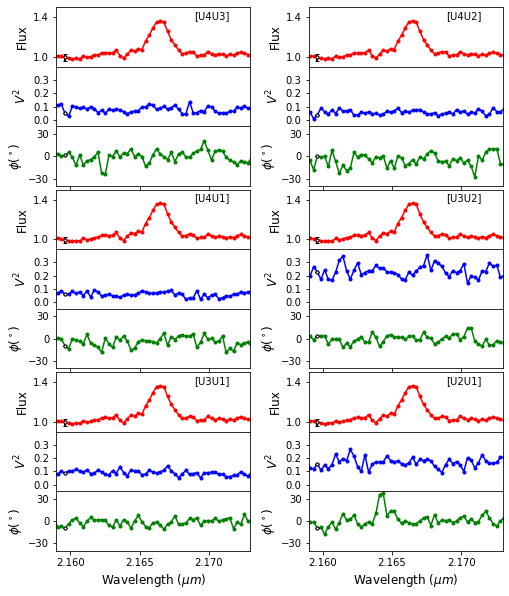

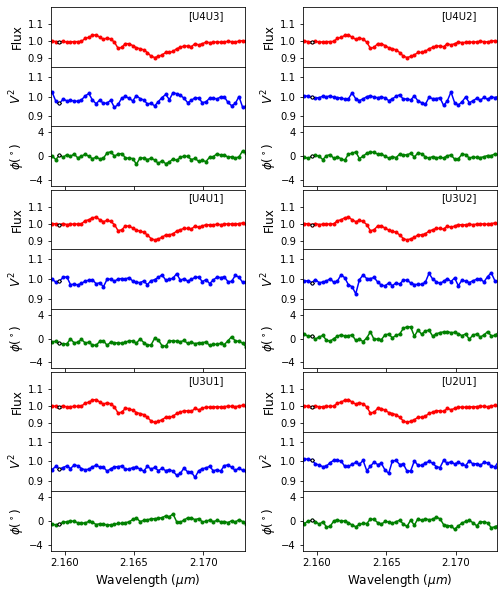

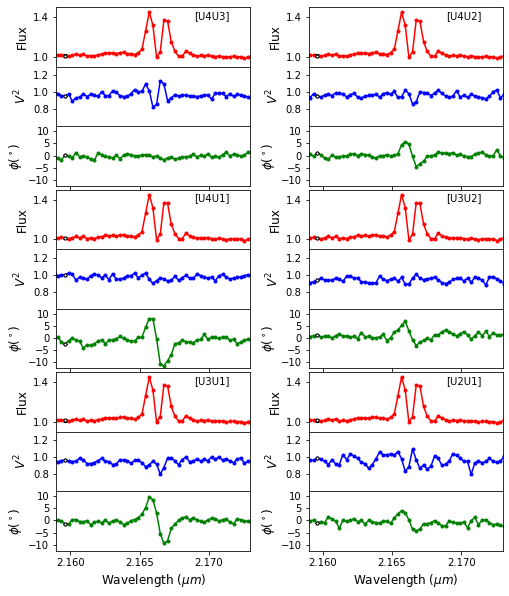

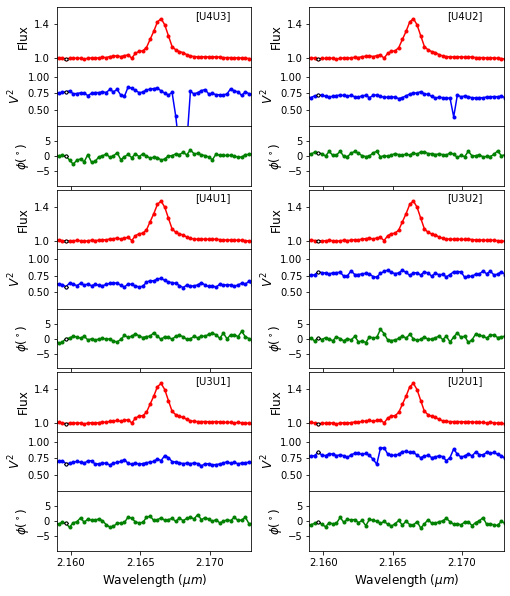

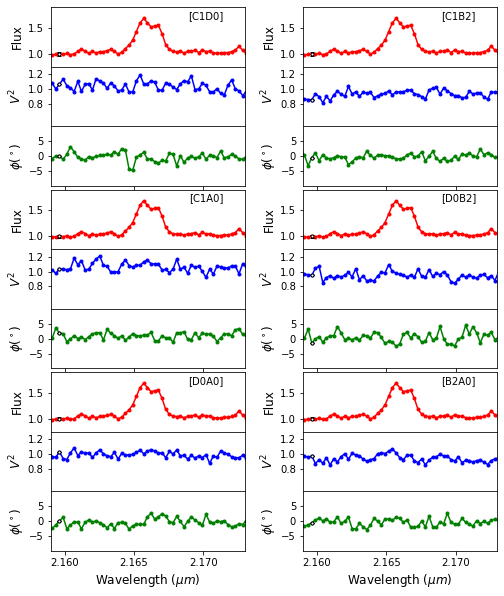

In [21]:

plot_figure = True
save_figure = True

x_axis_lim = [2.159,2.173]
#x_axis_lim = [2.165,2.167]

flux_ylim=[0.9,1.5]
visibility_ylim = [-0.05,0.4]
diff_phase_ylim = [-40,40]
flux_yticks=np.arange(1,1.6,0.4)
visibility_yticks =np.arange(0,0.35,0.1)
diff_phase_yticks=np.arange(-30,40,30)
miV590Mon.figure_3_plots(x_axis_lim,flux_ylim,visibility_ylim,diff_phase_ylim,flux_yticks,visibility_yticks,diff_phase_yticks,plot_figure, save_figure)

flux_ylim=[0.85,1.2]
visibility_ylim = [0.85,1.15]
diff_phase_ylim = [-5,5]
flux_yticks=np.arange(0.9,1.2,0.1)
visibility_yticks =np.arange(0.9,1.1,0.1)
diff_phase_yticks =np.arange(-4,5,4)
miPDS281.figure_3_plots(x_axis_lim,flux_ylim,visibility_ylim,diff_phase_ylim, flux_yticks, visibility_yticks,diff_phase_yticks,plot_figure, save_figure)

flux_ylim=[0.9,1.5]
visibility_ylim = [0.6,1.3]
diff_phase_ylim = [-12.5,12]
flux_yticks=np.arange(1,1.6,0.4)
visibility_yticks =np.arange(0.8,1.3,0.2)
diff_phase_yticks =np.arange(-10,11,5)
miHD94509.figure_3_plots(x_axis_lim,flux_ylim,visibility_ylim,diff_phase_ylim, flux_yticks, visibility_yticks,diff_phase_yticks,plot_figure, save_figure)

flux_ylim=[0.9,1.6]
visibility_ylim = [0.25,1.15]
diff_phase_ylim = [-10,10]
flux_yticks=np.arange(1,1.6,0.4)
visibility_yticks =np.arange(0.5,1.1,0.25)
diff_phase_yticks =np.arange(-5,10,5)
miDGCir.figure_3_plots(x_axis_lim,flux_ylim,visibility_ylim,diff_phase_ylim, flux_yticks, visibility_yticks,diff_phase_yticks,plot_figure, save_figure)


flux_ylim=[0.75,1.9]
visibility_ylim = [0.5,1.3]
diff_phase_ylim = [-10,10]
flux_yticks=np.arange(1,1.6,0.5)
visibility_yticks =np.arange(0.8,1.3,0.2)
diff_phase_yticks =np.arange(-5,10,5)
miHD141926.figure_3_plots(x_axis_lim,flux_ylim,visibility_ylim,diff_phase_ylim, flux_yticks, visibility_yticks,diff_phase_yticks,plot_figure, save_figure)

plot_figure = False


### Full bandwidth flux plot
This plot shows the full bandwidth of the science observation and a embeded zoom-in picture of the $Br\gamma$ region. The full picture includes science and calibrator relative in that region. 


In [22]:

x_axis_lim = [1.98,2.46]
flux_ylim = [0,18000] 
zoom_lower_xlim =2.163
zoom_higher_xlim = 2.170
zoom_ylim = [10000,18000] 
save_figure = False
miHD141926.figure_full_bandwidth_flux(x_axis_lim,flux_ylim, zoom_lower_xlim,zoom_higher_xlim,zoom_ylim,plot_figure, save_figure)


### Closure Phase

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

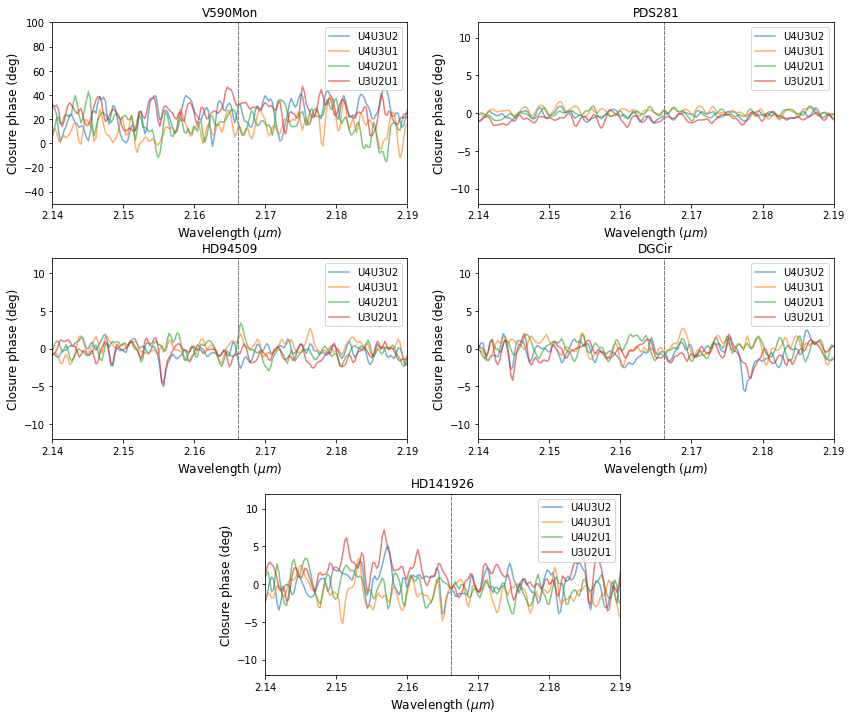

In [26]:
from scipy.signal import convolve as scipy_convolve


fig = plt.figure(figsize =([14, 12])) 

gs = gridspec.GridSpec(3, 4, wspace = 0.5, hspace = 0.3) 
  
ax1 = plt.subplot(gs[0, 0:2]) 
ax2 = plt.subplot(gs[0, 2:4]) 
ax3 = plt.subplot(gs[1, 0:2]) 
ax4 = plt.subplot(gs[1, 2:4]) 
  
ax5 = plt.subplot(gs[2, 1:3]) 
axes = [ax1, ax2, ax3, ax4, ax5]

        
j=0

for source in all_sources:
    source.phase_closure_convolved = {} 
    
    #Plot closure phases
    for  key, value in source.phase_closure.items():
        #Set convolution kernel with low convolution range (stddev=1)   
        gaussian_kernel = Gaussian1DKernel(stddev=1, x_size=len(source.phase_closure[key]), mode='oversample')
        
        #Convolve average closure phase with gaussian_kernel
        source.phase_closure_convolved[key] = scipy_convolve(source.phase_closure[key],gaussian_kernel, mode='same')

        #axes[j].plot(source.wl_A,source.phase_closure[key], alpha=0.6, label=key)
        axes[j].plot(source.wl_A,source.phase_closure_convolved[key], alpha=0.6, label=key)

        #print('Closure phase of ',str(source.source),'[', str(key),']',': ',np.median(source.phase_closure[key]),'/pm',np.std(source.phase_closure[key]))
        axes[j].legend(loc=1, fontsize = 10) # upper left corner
        axes[j].set_ylabel('Closure phase (deg)', fontsize = 12)
        axes[j].set_xlabel('Wavelength ($\mu m$)', fontsize = 12)
        axes[j].set_title(str(source.source), fontsize=12)  
        axes[j].set_xlim([2.14,2.19]) 
        axes[j].set_ylim([-12,12])
        axes[j].axvline(miHD94509.Brg, color="grey", lw=1, ls='--')

    j=j+1

#Set different axis limit for V590 Mon 
axes[0].set_ylim([-50,100])
      
#Save figure to disk
if save_figure:
    fig.savefig("./figures/closure_phases_Brg.eps", dpi=300)

#Close figure if plot_figure=False
if plot_figure==False:
    plt.close(fig)    # close the figure window



### u,v coverage


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

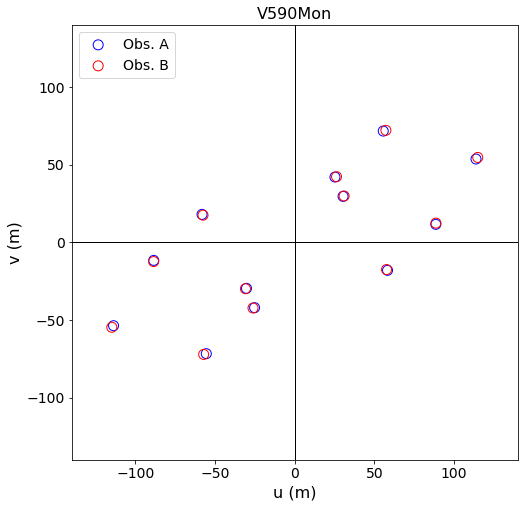

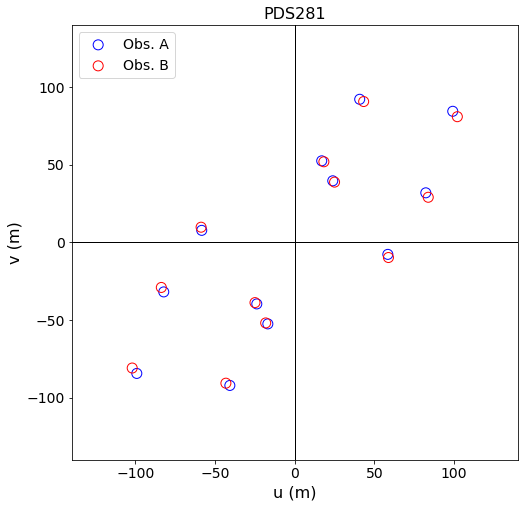

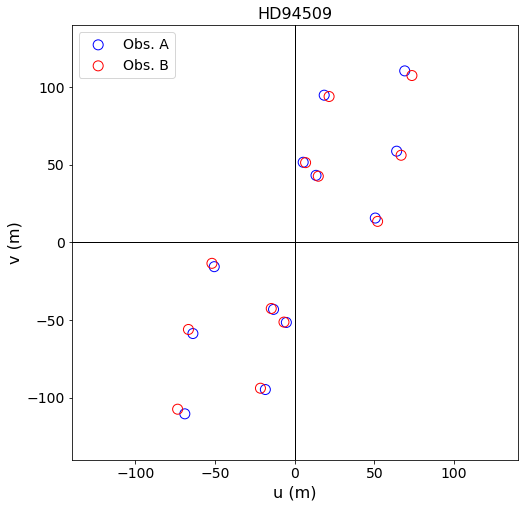

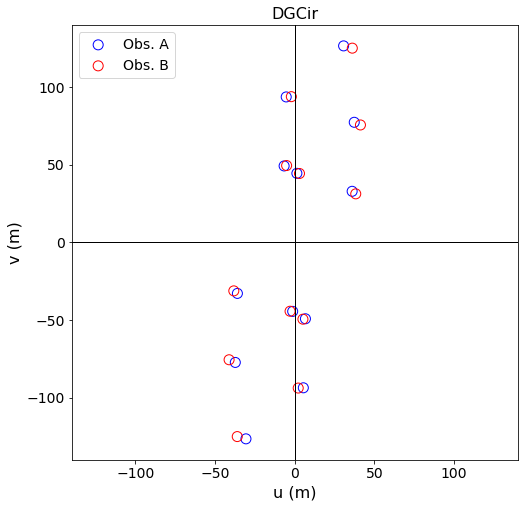

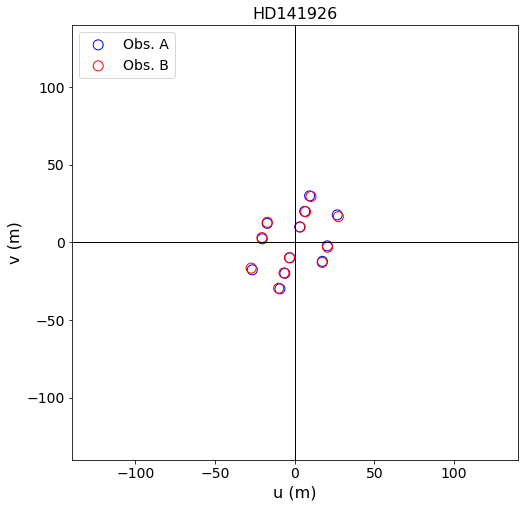

In [50]:

miV590Mon.figure_u_v_coverage(plot_figure, save_figure)
miPDS281.figure_u_v_coverage(plot_figure, save_figure)
miHD94509.figure_u_v_coverage(plot_figure, save_figure)
miDGCir.figure_u_v_coverage(plot_figure, save_figure)
miHD141926.figure_u_v_coverage(plot_figure, save_figure)


# Modelling
## LITpro input files
Once the processing itself is completed, we used the OIFITS Library to merge the final FITS data products in one single *OIFITS* file. 
This is not required for the python processing or visualization, but will be required for the LITpro modelling. 

### Continuum 
#### V590Mon Continuum crop and merge to OIFITS
```console
oifits-filter --wave-min=2150 --wave-max=2160 copy_V590Mon.fits continuum_V590Mon_left.fits 
oifits-filter --wave-min=2170 --wave-max=2180 copy_V590Mon.fits continuum_V590Mon_right.fits 

oifits-merge merged_continuum_V590Mon.oifits continuum_V590Mon_left.fits continuum_V590Mon_right.fits
```

#### PDS281 Continuum crop and merge to OIFITS
```console
oifits-filter --wave-min=2140 --wave-max=2160 copy_PDS281.fits continuum_PDS281_left.fits 
oifits-filter --wave-min=2170 --wave-max=2190 copy_PDS281.fits continuum_PDS281_right.fits 

oifits-merge merged_continuum_PDS281.oifits continuum_PDS281_left.fits continuum_PDS281_right.fits
```

#### HD94509 Continuum crop and merge to OIFITS
```console
oifits-filter --wave-min=2150 --wave-max=2163 copy_HD94509.fits continuum_HD94509_left.fits 
oifits-filter --wave-min=2170 --wave-max=2183 copy_HD94509.fits continuum_HD94509_right.fits 

oifits-merge merged_continuum_HD94509.oifits continuum_HD94509_left.fits continuum_HD94509_right.fits
```

#### DGCir Continuum crop and merge to OIFITS
```console
oifits-filter --wave-min=2153 --wave-max=2163 copy_DGCir.fits continuum_DGCir_left.fits 
oifits-filter --wave-min=2170 --wave-max=2180 copy_DGCir.fits continuum_DGCir_right.fits 

oifits-merge merged_continuum_DGCir.oifits continuum_DGCir_left.fits continuum_DGCir_right.fits
```

#### HD141926 Continuum crop and merge to OIFITS
```console
oifits-filter --wave-min=2140 --wave-max=2160 copy_HD141926.fits continuum_HD141926_left.fits 
oifits-filter --wave-min=2170 --wave-max=2190 copy_HD141926.fits continuum_HD141926_right.fits 

oifits-merge merged_continuum_HD141926.oifits continuum_HD141926_left.fits continuum_HD141926_right.fits
```
### $Br\gamma$

#### V590Mon $Br\gamma$ crop and set to OIFITS
```console
oifits-filter --wave-min=2165.2 --wave-max=2168 copy_V590Mon.fits Brg_V590Mon.fits 

oifits-merge Brg_V590Mon.oifits Brg_V590Mon.fits Brg_V590Mon.fits
```

#### PDS281 $Br\gamma$ crop and set  to OIFITS
```console
oifits-filter --wave-min=2164.5 --wave-max=2169 copy_PDS281.fits Brg_PDS281.fits 

oifits-merge Brg_PDS281.oifits Brg_PDS281.fits Brg_PDS281.fits
```

#### HD 94509 $Br\gamma$ crop, merge and set to OIFITS
We do also want to apply the LITpro modelling to the two peaks of Brg in HD 94509, so we choose two especific spectral channels: Brg1 (2164.8-2166.3 A) and Brg2 (2166.3 - 2167.8 A). 
In the case of HD94509, the continuum removal process is providing with uncertain results, therefore we decide not to apply this process and use the HD94509_before_cont_removal.fits file.
First, it was applied the filter to these spectral channels in both processed files, and the merge is applied afterwards (to the same BrgX_HD94509.fits file) to generate a OIFITS file.
Therefore, it were applied the following commands:

```console
oifits-filter --wave-min=2164.8 --wave-max=2166.3 HD94509_before_cont_removal.fits Brg1_HD94509.fits
oifits-filter --wave-min=2166.3 --wave-max=2167.8 HD94509_before_cont_removal.fits Brg2_HD94509.fits

oifits-merge Brg1_HD94509.oifits Brg1_HD94509.fits Brg1_HD94509.fits 
oifits-merge Brg2_HD94509.oifits Brg2_HD94509.fits Brg2_HD94509.fits 
```
This process generates two different OIFits files, one for each $Br\gamma$ peak. Both files will be load into the LITpro tool in order to perform the modelling.

#### DGCir $Br\gamma$ crop and set to OIFITS
```console
oifits-filter --wave-min=2165.2 --wave-max=2167.7 copy_DGCir.fits Brg_DGCir.fits 

oifits-merge Brg_DGCir.oifits Brg_DGCir.fits Brg_DGCir.fits
```

#### HD141926 $Br\gamma$ crop and set to OIFITS
```console
oifits-filter --wave-min=21640 --wave-max=2167.7 copy_HD141926.fits Brg_HD141926.fits 

oifits-merge Brg_HD141926.oifits Brg_HD141926.fits Brg_HD141926.fits
```

> **WARNING!! Brg_HD141926.oifits is incorrect!** For some reason in VIS2 at copy_HD141926.fits is stored the flux instead of the visibility. This needs to be checked out (pma).


The [OIFits Validator online tool](http://oival.jmmc.fr/index.html) can be used to verify the output files.

## LITpro Modelling
We modelled all our sources as gaussian elongated disks with a centered punctual source centered in the same position. DGCir also requires a background flux in its model to adjust to a good aproximated result. 

- LITpro INPUTS
- LIpro provides with OUTPUT

## Initial data

### Calculation of initial fluxes for source and disk in LITpro model
For calculating the initial fluxes in continuum, corresponding to source and disk in continuum, around $Br\gamma$, we use data of K band ($2.16\mu m$) excess for each source provided in Table 2 by [Vioque et al. (2018)](https://www.aanda.org/component/makeref/?task=show&type=html&doi=10.1051/0004-6361/201832870).

From that value we calculate the initial flux of source and disk to be applied in LITpro modelling, together with their minimum and maximum acotations. 


### V590Mon
There is no data of K_excess in Vioque_2018 therefore we use SED provided by [Chumpon et al. 2020]() and [Guzmán et al. 2020]() to provide with the initial relative fluxes of source and disk. According to this figure excess estimations in $Br\gamma$ for initial values: F\*=1e18 Fdisk=1e17  it is applied 90\% due to the disk and 10\% due to the host star, and no maximum or minimum restrictions (F\*=0.1 Fdisk=0.9, respectivelly).
![V590Mon SED](./figures/SED_V590Mon.png)

¿¿Comparing this fitting with a disk plus a source, the latter looks more accurate, meaning there could be a gap or a shift in the position of the center of the disk with reference to the source.??

### PDS281
There is no data of K_excess therefore we use SED provided by [Chumpon et al. 2020]() and [Guzmán et al. 2020]() to provide with the initial relative fluxes of source and disk.
According to this figure it is applied 0\% due to the disk and 100\% due to the host star, and no maximum or minimum restrictions.
![PDS281 SED](./figures/SED_PDS281.png)

|Name    | Kexcess| Fd0_min| Fd0  |Fd0_max  | F\*0_min|F\*0 | F\*0_max | 
| :-----:|:------:|:------:|:-----|:-------:|:-------:|:---:|:--------:|
|V590Mon |  -     | -      | 0.90 |    -    |    -    | 0.10|    -     |
|PDS281  |  -     | -      | 0.00 |    -    |    -    | 1.00|    -     |
|HD94509 |  1.53  | 0.27   | 0.35 | 0.41    | 0.59    | 0.65| 0.73     |
|DG Cir  | 30.63  | 0.964  | 0.968| 0.970   | 0.030   |0.032| 0.036    |
|HD141926|  2.31  | 0.52   | 0.57 | 0.61    | 0.39    | 0.43| 0.48     |




# LITpro Results
We get the following results in the LITpro model:

## V2 vs spatial frecuency
In the following function we get the baselines and the squared visibility as a function of each baseline.
This includes the model fitting results provided by LITpro as the red points.
The dashed line is also provided by LITpro, although in this case LITpro doesn't provide with a *.tsv* value but an image. We used the application [automeris.io](https://apps.automeris.io/wpd/) to retrieve these values from the image.

Here is represented V² as a function of the spatial frecuency 𝐵/𝜆 [𝑚/𝜇𝑚] given in [rad] units.

### V590Mon


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

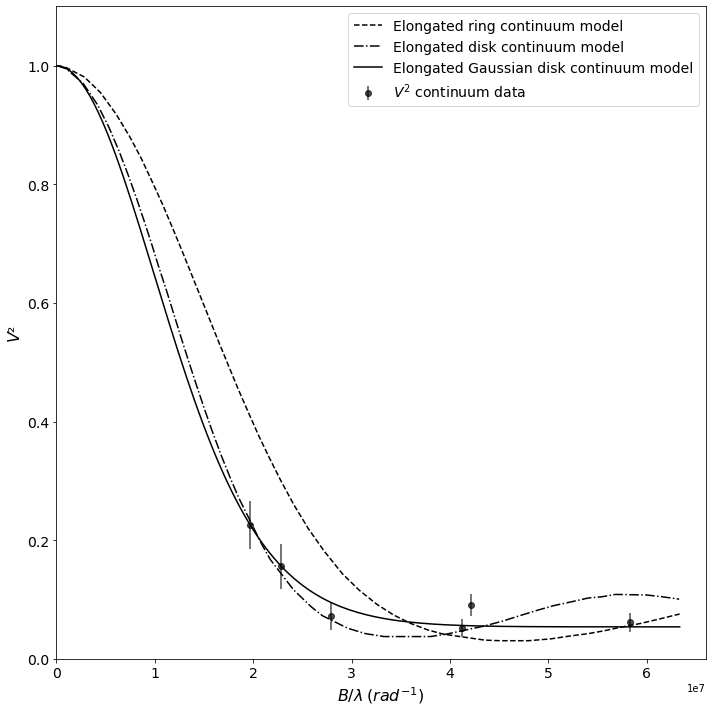

In [45]:
#Set object with previously calculated atributes
misource = miV590Mon

#Set plotting parameters
plot_figure=True
save_figure=True

#Set ploto limits
x_axis_lim = [-1000, 66000000]
y_axis_lim = [0,1.1]


# Gaussian disk model for Brg


# Read model data from automeris .csv file  
# (in the LITpro_output directory)  
ering_model_continuum_visibility2 = pd.read_csv("./LITpro_output/"+misource.source+"_ering_automeris_cont.csv", sep=';', header=0)

edisk_model_continuum_visibility2 = pd.read_csv("./LITpro_output/"+misource.source+"_edisk_automeris_cont.csv", sep=';', header=0)


#Sort, just in case 
ering_model_continuum_visibility2=ering_model_continuum_visibility2.sort_values(by=['X_data'])
edisk_model_continuum_visibility2=edisk_model_continuum_visibility2.sort_values(by=['X_data'])

wave_cont_ering_model = ering_model_continuum_visibility2['X_data'].to_numpy()
V2_cont_ering_model = ering_model_continuum_visibility2['Y_data'].to_numpy()
wave_cont_edisk_model = edisk_model_continuum_visibility2['X_data'].to_numpy()
V2_cont_edisk_model = edisk_model_continuum_visibility2['Y_data'].to_numpy()


## Read fitting data from LITpro .tsv file  
## (in the LITpro_output directory)
LITpro_ering_continuum_visibility2 = pd.read_csv("./LITpro_output/"+misource.source+"_LITpro_model_ering_cont.tsv", sep='\t', header=3)
LITpro_ering_Brg_visibility2 = pd.read_csv("./LITpro_output/"+misource.source+"_LITpro_model_ering_Brg.tsv", sep='\t', header=3)
#Sort, just in case 
LITpro_ering_continuum_visibility2=LITpro_ering_continuum_visibility2.sort_values(by=['#x'])
LITpro_ering_Brg_visibility2=LITpro_ering_Brg_visibility2.sort_values(by=['#x'])


#ax[0,0].axes.errorbar(source.line_visibility2['U2U1'][0], source.line_visibility2['U2U1'][1],yerr=source.line_visibility2['U2U1'][2], fmt='r*-',label='Continuum corrected $V^2$')


#Generate plot
fig, ax = plt.subplots(figsize=(10, 10))

#Iteration in all telescopes baselines for observation data
i=0
for  key, value in misource.visibility2.items():
    # Plot errorbar with Observation Data
    ax.errorbar(misource.baseline[key]*1000000/misource.Brg, misource.continuum_visibility2[key], yerr=misource.continuum_visibility2_error[key], c='black',fmt='o',alpha=0.7, capthick=2, label='$V^2$ continuum data' if i == 0 else "")
    #ax.errorbar(misource.baseline[key]*1000000/misource.Brg, misource.line_visibility2[key], yerr=misource.line_visibility2_error[key], c='green',fmt='o', alpha=0.7, capthick=2, label='$V^2$ Brg data' if i == 0 else "")

    # Models do not require baseline iteration 
    if i == 0:
        ax.plot(wave_cont_ering_model,V2_cont_ering_model, '--', color='black',label='Elongated ring continuum model')
        ax.plot(wave_cont_edisk_model,V2_cont_edisk_model, '-.', color='black',label='Elongated disk continuum model')
        #ax.scatter(LITpro_ering_continuum_visibility2[['#x']], LITpro_ering_continuum_visibility2[['modelValue']],label='$V^2$ continuum model', color='grey', marker="o", alpha=0.7, facecolor="none", s=100)
        #ax.scatter(LITpro_ering_Brg_visibility2[['#x']], LITpro_ering_Brg_visibility2[['modelValue']],label='$V^2 \: Br\gamma$ model', color='red', marker='+',alpha=0.7, s=100)
    i=i+1



# Gaussian disk model for continuum
#Generate B_over_lambda (X-axis) linspace 
B_over_lambda = np.linspace(0, max(wave_cont_ering_model), 150)
         
#Parameters of the elongated Gaussian disk model
eGauss_FWHM = 5.95746 #  in mas           
eGauss_FWHM_rad = eGauss_FWHM/(206264.8*1000) # in radians 
flux_eGauss = 0.766916
gaussian_model_visibility = np.exp(-(np.pi*eGauss_FWHM_rad * B_over_lambda)**2/(4*np.log(2)))
#Punctual source component
flux_punct_gauss = 0.233084

#Visibilities calculation weighted by components flux
visibility2_Gauss_model = (flux_eGauss *gaussian_model_visibility + flux_punct_gauss * 1)**2

# Elongated Gaussian model curve as with the LITpro FWHM disk size and flux weight results
ax.plot(B_over_lambda,visibility2_Gauss_model, '-', color='black',label='Elongated Gaussian disk continuum model')


#Plot setup
ax.set_xlim(x_axis_lim)
ax.set_ylim(y_axis_lim)
#ax.set_title(str(misource.source))
ax.set_xlabel('$B/\lambda \: (rad^{-1}$)', size=16)
ax.set_ylabel('$V²$', size=16)
ax.legend(loc=0,fontsize=14)        
ax.tick_params(labelsize=14)
        
#Ensure no overlapping in plots
fig.tight_layout()

save_figure=True

#Save figure
if save_figure:
    #Save figure to disk
    fig.savefig('./figures/'+str(misource.source) + "_V2_vs_spatial_frecuency" + ".eps", dpi=300)


#Close figure if plot_figure=False
if plot_figure==False:
    plt.close(fig)    # close the figure window



## PDS281
This source is unresolved both in the continuum and in Br$\gamma$. 
Thus, there is no need for a model. 
An upper limit to the size of the continuum and the line emitting regions should suffice. 
This upper limit is given by $\lambda$/2B, with $\lambda$ $\sim$ 2.1667 $\mu$m and B the largest (projected) baseline ('U4U1') for this source during the observations (130 m).
The upper limit is given as a radius, therefore the maximum observable angular resolution must be divided by 2. 

In [59]:

misource = miPDS281

#Get maximum baseline
B_max = max(misource.baseline.values())

#Use calculate_max_angular_resolution_mas function
max_angular_resolution_mas = calculate_max_angular_resolution_mas(B_max, misource.Brg)

print(f"{misource.source} maximum baseline = {B_max:3.2f} m")
print(f"{misource.source} maximum angular resolution = {max_angular_resolution_mas:3.3f} mas")

#The upper limit is given as a radius, therefore divided by 2.
print(f"{misource.source} Radius upper limit = {max_angular_resolution_mas/2:3.3f} mas")


PDS281 maximum baseline = 130.16 m
PDS281 maximum angular resolution = 1.716 mas
PDS281 Radius upper limit = 0.858 mas


In [60]:
x_axis_lim = [0, 65000000]

y_axis_lim = [0.0,1.1]
miPDS281.figure_V2_vs_spatial_frecuency(x_axis_lim,y_axis_lim,plot_figure, save_figure)


## HD94509
This source is unresolved both in the continuum and in Br$\gamma$. 
Thus, there is no need for a model. 
An upper limit to the size of the continuum and the line emitting regions should suffice. 
This upper limit is given by $\lambda$/2B, with $\lambda$ $\sim$ 2.1667 $\mu$m and B the largest (projected) baseline ('U4U1') for this source during the observations (130 m).



In [61]:

misource = miHD94509


#Get maximum baseline
B_max = max(misource.baseline.values())

#Use calculate_max_angular_resolution_mas function
max_angular_resolution_mas = calculate_max_angular_resolution_mas(B_max, misource.Brg)

print(f"{misource.source} maximum baseline = {B_max:3.2f} m")
print(f"{misource.source} maximum angular resolution = {max_angular_resolution_mas:3.3f} mas")

#The upper limit is given as a radius, therefore divided by 2.
print(f"{misource.source} Radius upper limit = {max_angular_resolution_mas/2:3.3f} mas")


HD94509 maximum baseline = 130.16 m
HD94509 maximum angular resolution = 1.716 mas
HD94509 Radius upper limit = 0.858 mas


### Specific plot for HD94509 with two separated $Br\gamma$ lines

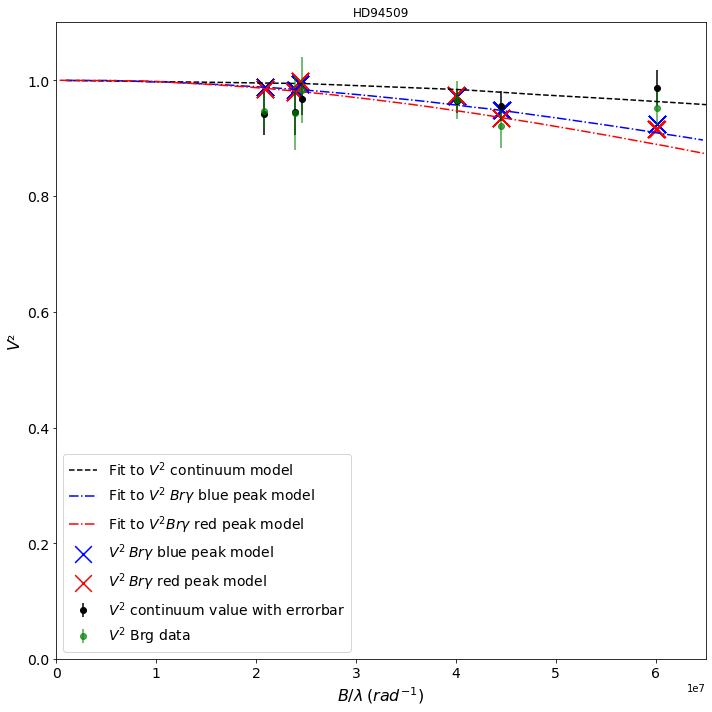

In [62]:

import pandas as pd
from scipy.interpolate import interp1d



x_axis_lim = [0, 65000000]
y_axis_lim = [0.0,1.1]

misource = miHD94509 


"""
In this function is represented V² as a function of the spatial frecuency 𝐵/𝜆 [𝑚/𝜇𝑚] given in [rad] units.

"""

##Get baselines values B/lambda 
baseline_A = {}
baseline_B = {}
baseline = {}
for  key, value in miHD94509.uV2_A.items():
    baseline_A[key] = sqrt(miHD94509.uV2_A[key]**2 + miHD94509.vV2_A[key]**2)
    baseline_B[key] = sqrt(miHD94509.uV2_B[key]**2 + miHD94509.vV2_B[key]**2)
    baseline[key] = mean([baseline_A[key],baseline_B[key]])


# Read fitting data from automeris .csv file  
# (in the LITpro_output directory)  
LITpro_continuum_visibility2 = pd.read_csv("./LITpro_output/"+miHD94509.source+"_cont_LITpro_fit_2.tsv", sep='\t', header=3)
LITpro_Brg1_visibility2 = pd.read_csv("./LITpro_output/"+miHD94509.source+"_Brg1_LITpro_fit.tsv", sep='\t', header=3)
LITpro_Brg2_visibility2 = pd.read_csv("./LITpro_output/"+miHD94509.source+"_Brg2_LITpro_fit.tsv", sep='\t', header=3)

LITpro_continuum_visibility2=LITpro_continuum_visibility2.sort_values(by=['#x'])
wave_LITpro = LITpro_continuum_visibility2['#x'].to_numpy()
modelValue_LITpro = LITpro_continuum_visibility2['modelValue'].to_numpy()

LITpro_Brg1_visibility2=LITpro_Brg1_visibility2.sort_values(by=['#x'])
LITpro_Brg2_visibility2=LITpro_Brg2_visibility2.sort_values(by=['#x'])
#wave_LITpro = LITpro_Brg_visibility2['#x'].to_numpy()
#modelValue_LITpro = LITpro_Brg_visibility2['modelValue'].to_numpy()

# Read fitting data from LITpro .tsv file  
# (in the LITpro_output directory)
fitted_continuum_visibility2 = pd.read_csv("./LITpro_output/"+miHD94509.source+"_automeris_cont.csv", sep=';', header=0)
fitted_Brg1_visibility2 = pd.read_csv("./LITpro_output/"+miHD94509.source+"_automeris_Brg_1.csv", sep=';', header=0)
fitted_Brg2_visibility2 = pd.read_csv("./LITpro_output/"+miHD94509.source+"_automeris_Brg_2.csv", sep=';', header=0)

#Sort, just in case 
fitted_continuum_visibility2=fitted_continuum_visibility2.sort_values(by=['X_data'])
fitted_Brg1_visibility2=fitted_Brg1_visibility2.sort_values(by=['X_data'])
fitted_Brg2_visibility2=fitted_Brg2_visibility2.sort_values(by=['X_data'])

wave_cont = fitted_continuum_visibility2['X_data'].to_numpy()
modelValue_cont = fitted_continuum_visibility2['Y_data'].to_numpy()

#Generate interpolated curve to fit values
#interpolated_modelValue_cont = interp1d(wave_cont, modelValue_cont, kind='cubic')
#wave_cont_oversampled = np.linspace(min(wave_cont), max(wave_cont), num=5, endpoint=True)

#Generate interpolated curve to fit values
interpolated_modelValue_cont = interp1d(wave_LITpro, modelValue_LITpro, kind='slinear', fill_value="extrapolate")
#wave_cont_oversampled = np.linspace(min(wave_LITpro), max(wave_LITpro), num=5, endpoint=False)
wave_cont_oversampled = np.linspace(1000000, 80000000, num=10, endpoint=False)


wave_Brg1 = fitted_Brg1_visibility2['X_data'].to_numpy()
modelValue_Brg1 = fitted_Brg1_visibility2['Y_data'].to_numpy()
wave_Brg2 = fitted_Brg2_visibility2['X_data'].to_numpy()
modelValue_Brg2 = fitted_Brg2_visibility2['Y_data'].to_numpy()

fig, ax = plt.subplots(figsize=(10, 10))

i=0
for  key, value in miHD94509.visibility2.items():
    #Generate interpolated model fitting values
    ax.errorbar(misource.baseline[key]*1000000/miHD94509.Brg, miHD94509.continuum_visibility2[key], yerr=miHD94509.continuum_visibility2_error[key], c='black',fmt='o', capthick=2, label='$V^2$ continuum value with errorbar' if i == 0 else "")
    ax.errorbar(misource.baseline[key]*1000000/misource.Brg,   misource.line_visibility2[key], yerr=misource.line_visibility2_error[key], c='green',fmt='o', alpha=0.7, capthick=2, label='$V^2$ Brg data' if i == 0 else "")
    
    if i == 0:
        #ax.plot(wave_cont,modelValue_cont, '--', color='black',label='Fit to $V^2$ continuum model')
        #ax.plot(wave_cont_oversampled,interpolated_modelValue_cont(wave_cont_oversampled), '-', color='green',label='TEST to $V^2$ continuum model')
        ax.plot(wave_cont_oversampled,interpolated_modelValue_cont(wave_cont_oversampled), '--', color='black',label='Fit to $V^2$ continuum model')
        ax.plot(wave_Brg1,modelValue_Brg1, '-.', color='blue',label='Fit to $V^2 \; Br\gamma$ blue peak model')
        ax.plot(wave_Brg2,modelValue_Brg2, '-.', color='red',label='Fit to $V^2 Br\gamma$ red peak model')
        #ax.scatter(fitted_continuum_visibility2[['#x']], fitted_continuum_visibility2[['dataValue']],label=' $V^2$ Data')
        #ax.scatter(LITpro_continuum_visibility2[['#x']], LITpro_continuum_visibility2[['modelValue']],label='$V^2$ continuum model', color='black', marker='x',s=280)
        ax.scatter(LITpro_Brg1_visibility2[['#x']], LITpro_Brg1_visibility2[['modelValue']],label='$V^2 \: Br\gamma$ blue peak model', color='blue', marker='x',s=280)
        ax.scatter(LITpro_Brg2_visibility2[['#x']], LITpro_Brg2_visibility2[['modelValue']],label='$V^2 \: Br\gamma$ red peak model', color='red', marker='x',s=280)

    i=i+1
 
ax.set_xlim(x_axis_lim)
ax.set_ylim(y_axis_lim)
ax.set_title(str(miHD94509.source))
ax.set_xlabel('$B/\lambda \: (rad^{-1}$)', size=16)
ax.set_ylabel('$V²$', size=16)
ax.legend(loc=0,fontsize=14)        
ax.tick_params(labelsize=14)
        
#Ensure no overlapping in plots
fig.tight_layout()


#Save figure
if save_figure:
    #Save figure to disk
    fig.savefig('./figures/'+str(miHD94509.source) + "_V2_vs_spatial_frecuency" + ".eps", dpi=300)




## DGCir


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

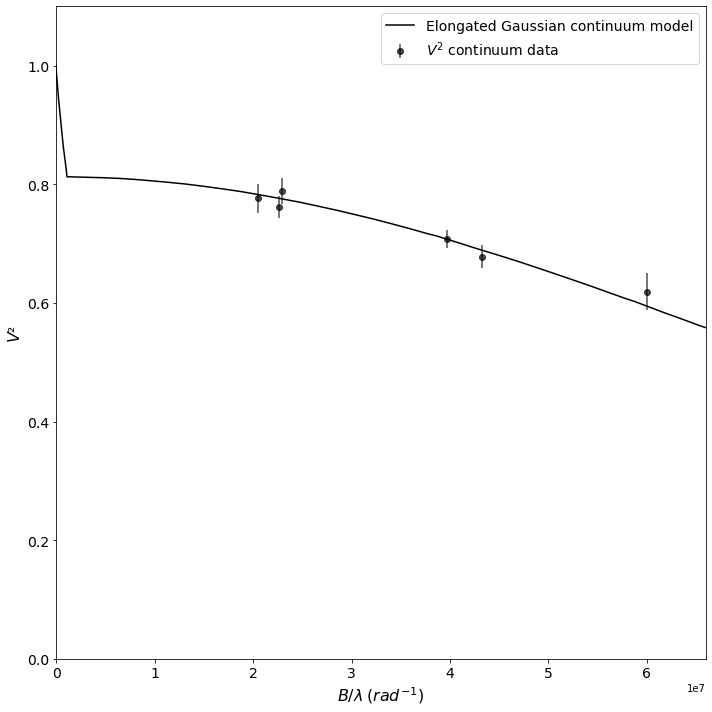

In [47]:
#Set object with previously calculated atributes
misource = miDGCir

#Set plotting parameters

#Set ploto limits
x_axis_lim = [-1000, 66000000]
y_axis_lim = [0,1.1]


# Gaussian disk model for Brg


# Read model data from automeris .csv files  
# (in the LITpro_output directory)  
eGauss_model_continuum_visibility2 = pd.read_csv("./LITpro_output/"+misource.source+"_eGauss_automeris_cont.csv", sep=';', header=0)

ering_model_continuum_visibility2 = pd.read_csv("./LITpro_output/"+misource.source+"_ering_automeris_cont.csv", sep=';', header=0)
ering_model_Brg_visibility2 = pd.read_csv("./LITpro_output/"+misource.source+"_ering_automeris_Brg.csv", sep=';', header=0)

edisk_model_continuum_visibility2 = pd.read_csv("./LITpro_output/"+misource.source+"_edisk_automeris_cont.csv", sep=';', header=0)


#Sort, just in case 
eGauss_model_continuum_visibility2=eGauss_model_continuum_visibility2.sort_values(by=['X_data'])

ering_model_continuum_visibility2=ering_model_continuum_visibility2.sort_values(by=['X_data'])
ering_model_Brg_visibility2=ering_model_Brg_visibility2.sort_values(by=['X_data'])

edisk_model_continuum_visibility2=edisk_model_continuum_visibility2.sort_values(by=['X_data'])

wave_cont_eGauss_model = eGauss_model_continuum_visibility2['X_data'].to_numpy()
V2_cont_eGauss_model = eGauss_model_continuum_visibility2['Y_data'].to_numpy()

wave_cont_ering_model = ering_model_continuum_visibility2['X_data'].to_numpy()
V2_cont_ering_model = ering_model_continuum_visibility2['Y_data'].to_numpy()
wave_Brg_ering_model = ering_model_Brg_visibility2['X_data'].to_numpy()
V2_Brg_ering_model = ering_model_Brg_visibility2['Y_data'].to_numpy()

wave_cont_edisk_model = edisk_model_continuum_visibility2['X_data'].to_numpy()
V2_cont_edisk_model = edisk_model_continuum_visibility2['Y_data'].to_numpy()


## Read fitting data from LITpro .tsv file  
## (in the LITpro_output directory)
LITpro_ering_continuum_visibility2 = pd.read_csv("./LITpro_output/"+misource.source+"_LITpro_model_ering_cont.tsv", sep='\t', header=3)
LITpro_ering_Brg_visibility2 = pd.read_csv("./LITpro_output/"+misource.source+"_LITpro_model_ering_Brg.tsv", sep='\t', header=3)
#Sort, just in case 
LITpro_ering_continuum_visibility2=LITpro_ering_continuum_visibility2.sort_values(by=['#x'])
LITpro_ering_Brg_visibility2=LITpro_ering_Brg_visibility2.sort_values(by=['#x'])


#ax[0,0].axes.errorbar(source.line_visibility2['U2U1'][0], source.line_visibility2['U2U1'][1],yerr=source.line_visibility2['U2U1'][2], fmt='r*-',label='Continuum corrected $V^2$')


#Generate plot
fig, ax = plt.subplots(figsize=(10, 10))

#Iteration in all telescopes baselines for observation data
i=0
for  key, value in misource.visibility2.items():
    # Plot errorbar with Observation Data
    ax.errorbar(misource.baseline[key]*1000000/misource.Brg, misource.continuum_visibility2[key], yerr=misource.continuum_visibility2_error[key], c='black',fmt='o',alpha=0.7, capthick=2, label='$V^2$ continuum data' if i == 0 else "")
    #ax.errorbar(misource.baseline[key]*1000000/misource.Brg, misource.line_visibility2[key], yerr=misource.line_visibility2_error[key], c='green',fmt='o', alpha=0.7, capthick=2, label='$V^2$ Brg data' if i == 0 else "")

    # Models do not require baseline iteration 
    if i == 0:
        ax.plot(wave_cont_eGauss_model,V2_cont_eGauss_model, '-', color='black',label='Elongated Gaussian continuum model')
        #ax.plot(wave_cont_ering_model,V2_cont_ering_model, '-.', color='blue',label='Elongated ring continuum model')
        #ax.plot(wave_cont_edisk_model,V2_cont_edisk_model, '--', color='green',label='Elongated disk continuum model')
        #ax.plot(wave_Brg_ering_model,V2_Brg_ering_model, '--', color='green',label='Elongated ring $Br\gamma$ model')
        #ax.scatter(LITpro_ering_continuum_visibility2[['#x']], LITpro_ering_continuum_visibility2[['modelValue']],label='$V^2$ continuum model', color='grey', marker="o", alpha=0.7, facecolor="none", s=100)
        #ax.scatter(LITpro_ering_Brg_visibility2[['#x']], LITpro_ering_Brg_visibility2[['modelValue']],label='$V^2 \: Br\gamma$ model', color='red', marker='+',alpha=0.7, s=100)
    i=i+1



# Gaussian disk model for continuum
#Generate B_over_lambda (X-axis) linspace 
B_over_lambda = np.linspace(0, max(wave_cont_ering_model), 150)
         
#Parameters of the elongated Gaussian disk model
eGauss_FWHM = 0.79068 #  in mas           
eGauss_FWHM_rad = eGauss_FWHM/(206264.8*1000) # in radians 
flux_eGauss = 0.70
gaussian_model_visibility = np.exp(-(np.pi*eGauss_FWHM_rad * B_over_lambda)**2/(4*np.log(2)))
#Punctual source component
flux_punct_gauss = 0.2

#Background component
flux_background = 0.098
if B_over_lambda.any == 0:
    background_visibility = 1
else:
    background_visibility = 0


#Visibilities calculation weighted by components flux
visibility2_Gauss_model = (flux_eGauss *gaussian_model_visibility + flux_punct_gauss * 1+ flux_background *background_visibility)**2

# Elongated Gaussian model curve as with the LITpro FWHM disk size and flux weight results
#ax.plot(B_over_lambda,visibility2_Gauss_model, '-', color='black',label='Elongated Gaussian disk continuum model')


#Plot setup
ax.set_xlim(x_axis_lim)
ax.set_ylim(y_axis_lim)
#ax.set_title(str(misource.source))
ax.set_xlabel('$B/\lambda \: (rad^{-1}$)', size=16)
ax.set_ylabel('$V²$', size=16)
ax.legend(loc=0,fontsize=14)        
ax.tick_params(labelsize=14)
        
#Ensure no overlapping in plots
fig.tight_layout()

save_figure = True
#Save figure
if save_figure:
    #Save figure to disk
    fig.savefig('./figures/'+str(misource.source) + "_V2_vs_spatial_frecuency" + ".eps", dpi=300)


#Close figure if plot_figure=False
if plot_figure==False:
    plt.close(fig)    # close the figure window



## HD141926
This source is unresolved both in the continuum and in Br$\gamma$. 
Thus, there is no need for a model. 
An upper limit to the size of the continuum and the line emitting regions should suffice. 
This upper limit is given by $\lambda$/2B, with $\lambda$ $\sim$ 2.1667 $\mu$m and B the largest (projected) baseline ('U3U1') for this source during the observations (32 m).

In [34]:
HD141926_disk_upper_limit_in_mas = (miHD141926.Brg/1000000)/(2*miHD141926.baseline['U3U1'])*180*3600*1000/(2*np.pi)
print(f"HD141926 Upper limit = {HD141926_disk_upper_limit_in_mas} mas")


HD141926 Upper limit = 3.491783212255921 mas


In [65]:

x_axis_lim = [0, 17000000]
y_axis_lim = [0.8,1.1]
miHD141926.figure_V2_vs_spatial_frecuency(x_axis_lim,y_axis_lim,plot_figure, save_figure)

## Baselines and maximum angular resolution
Based on the maximum observation baseline for each source and the $Br\gamma$ wavelength, we provide with the maximum angular resolution at that observation line as $\lambda/2B$.

In [66]:
misource = miHD141926


#Get maximum baseline
B_max = max(misource.baseline.values())

#Use calculate_max_angular_resolution_mas function
max_angular_resolution_mas = calculate_max_angular_resolution_mas(B_max, misource.Brg)

print(f"{misource.source} maximum baseline = {B_max:3.2f} m")
print(f"{misource.source} maximum angular resolution = {max_angular_resolution_mas:3.3f} mas")

#The upper limit is given as a radius, therefore divided by 2.
print(f"{misource.source} Radius upper limit = {max_angular_resolution_mas/2:3.3f} mas")


HD141926 maximum baseline = 31.99 m
HD141926 maximum angular resolution = 6.984 mas
HD141926 Radius upper limit = 3.492 mas
